# Imports

In [117]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from factor_analyzer import FactorAnalyzer
import math
import pingouin as pg
import pycountry

# Data Retrieving And Processing

In [118]:
# set time range for data [min_year; max_year]
min_year = 2010
max_year = 2019

In [119]:
# names of countries of the world
countries = list([c.name for c in pycountry.countries])
countries

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'French Southern Territories',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire, Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Saint Barthélemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Cocos (Keeling) Islands',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, The Democratic Republic of the',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Christmas Island',
 'Cayman Islands',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica'

In [120]:
# reads data from csv file, filters it and imputes missing data
def process_data(file_name: str, value_column: str, country_column: str = 'Entity') -> pd.DataFrame:
    
    # read DataFrame from .csv file
    df = pd.read_csv(file_name)
    
    # filter data according to years range and remove countries with wrong names
    df = df[(df['Year'] >= min_year) & (df['Year'] <= max_year) & (df[country_column].isin(countries))]
    
    # pivot table
    df = df.pivot_table(values=value_column, index=country_column, columns='Year')
    
    # impute missing data
    imp = IterativeImputer(max_iter=100)
    df = pd.DataFrame(imp.fit_transform(df), columns=df.columns, index=df.index)
    
    return df

In [121]:
# read corruption data
corruption_index = pd.read_csv('data/corruption_index.csv')

# remove countries with wrong names
corruption_index = corruption_index[corruption_index['Country Name'].isin(countries)]

# set country name as index
corruption_index.set_index('Country Name', inplace=True)

# get years columns
corruption_index = corruption_index[[c for c in corruption_index.columns if c[:4].isdigit()]]

# rename years columns
corruption_index.columns = [c[:4] for c in corruption_index.columns]

# filter years in range
corruption_index = corruption_index[[c for c in corruption_index.columns if int(c) in range(min_year, max_year + 1)]]

corruption_index

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,
Afghanistan,0.952381,0.473934,1.421801,0.947867,5.288462,5.714286,3.809524,3.809524,4.761905,5.714286
Albania,37.142857,24.644550,25.118483,24.170616,34.134617,36.190475,37.619049,40.476189,33.333332,32.380951
Algeria,34.761906,34.597157,36.018959,39.336494,31.250000,30.476191,30.000000,31.904762,28.571428,28.095238
American Samoa,67.619049,66.824646,65.876778,65.876778,87.019234,85.714287,87.142860,93.809525,93.333336,94.285713
Andorra,88.095238,87.203789,87.203789,86.729858,87.019234,85.714287,87.142860,86.190475,86.190475,87.142860
...,...,...,...,...,...,...,...,...,...,...
Uruguay,85.714287,87.677727,88.625595,89.573463,89.903847,89.047623,89.047623,88.095238,86.666664,88.095238
Uzbekistan,4.285714,2.843602,4.265403,8.056872,9.615385,8.571428,10.952381,11.904762,12.857142,15.238095
Vanuatu,65.238098,66.350708,67.298576,64.454979,68.269234,53.333332,53.809525,56.190475,49.523811,45.714287


In [122]:
education_expenditure = process_data('data/education_expenditure.csv', 'Education Expenditure')
education_expenditure

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,
Afghanistan,3.479450,3.462010,2.604200,3.454460,3.695220,3.255800,4.543970,4.343190,4.054974,4.020625
Albania,3.413075,3.240008,3.309061,3.539300,3.216967,3.437970,3.962090,3.611720,3.152945,3.916240
Algeria,6.860591,7.278938,7.637597,7.292296,7.318701,7.962967,7.344343,6.401838,6.324539,6.036907
Andorra,2.976630,2.987060,2.565779,2.506160,3.074210,3.280350,3.237070,3.217090,3.246720,3.150610
Angola,3.421320,3.240000,3.081911,3.870000,2.930000,3.100000,2.754937,2.466879,2.044701,2.073064
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,6.591994,5.818761,6.026915,5.741910,5.713230,5.494534,5.415237,5.033320,4.835893,6.295347
Vanuatu,3.210980,4.929490,5.177989,4.941659,5.181950,5.603380,4.960996,4.533430,3.297122,1.774070
Yemen,4.392223,5.042027,5.464790,5.098329,5.230106,5.263024,5.144237,5.006828,4.819340,4.417525


In [123]:
energy_use = process_data('data/energy_use.csv', 'Energy consumption per capita')
energy_use

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,
Afghanistan,1182.8920,1436.1143,1324.1211,1060.7926,868.5762,970.0803,862.79114,829.31195,924.25085,802.61255
Albania,12377.5040,10854.6490,10652.8090,13392.7740,11809.4610,11824.3140,13823.74800,12802.36000,14609.70100,11585.55500
Algeria,12243.1560,12710.5410,13624.9090,14130.7350,15108.6350,15616.3110,15295.14300,15164.00000,15971.08400,16259.05300
American Samoa,45970.5400,26492.0900,26916.0250,27255.6660,27663.8850,28115.4860,28760.44000,29360.25600,29987.85700,30681.02000
Angola,3560.0942,3594.4900,3615.5242,3897.9126,4135.0474,4159.5776,3661.55130,3370.89620,3366.39330,3667.42380
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2766.5137,3125.8760,2561.1620,2422.6257,2701.0388,2484.0690,2445.86840,2661.32180,3346.09030,3154.47170
Western Sahara,2586.2825,2489.9570,2403.5256,2309.8936,2236.1448,2171.4944,2108.19730,2096.69900,2044.89730,1996.58970
Yemen,4030.7585,3289.4512,2769.0400,3797.8290,3495.3290,1837.1029,1432.55220,1288.87670,1170.72610,1475.98520


In [124]:
gdp = process_data('data/gdp.csv', 'GDP Per Person')
gdp

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,
Albania,10522.6670,10711.4670,11106.7690,10646.3250,11079.8090,11644.7920,11674.5890,12126.523000,12267.312000,12531.788000
Algeria,14808.7670,15523.8920,14968.8090,14278.2150,13804.1400,12512.0070,11854.6040,11408.486000,11773.642000,11787.492000
Angola,6834.3700,8334.1100,9143.0570,9320.8920,9460.2020,8058.7270,7581.5454,7718.856400,7588.662000,7159.579000
Anguilla,28403.2440,27989.9220,25566.4550,21739.5920,20429.6370,17478.2070,15636.5130,13414.325000,10206.005000,15177.923000
Antigua and Barbuda,21019.0880,21799.5640,21588.5430,19078.6050,9101.8590,16416.9240,16229.5690,19993.600442,24634.686137,28732.893640
...,...,...,...,...,...,...,...,...,...,...
Uruguay,17710.6040,19352.5470,19712.1880,19969.3440,20720.6930,20543.2520,20435.4820,20615.557000,20458.264000,20545.422000
Uzbekistan,7567.7266,8462.5130,9236.4360,9558.7090,9850.4460,10492.5100,10490.1520,10927.627981,11435.057644,11926.281867
Yemen,4891.9120,4239.4440,3917.6182,3906.5862,3739.2190,2533.9111,2023.4292,1429.165500,1755.317300,1777.251100


In [125]:
health_expenditure = process_data('data/health_expenditure.csv', 'Health Expenditure')
health_expenditure

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,
Albania,2.442000,2.387,2.474,2.605,2.617,2.755,2.842,2.762,2.878,3.080726
Argentina,5.572000,5.688,6.144,6.264,6.361,6.853,5.619,6.644,5.965,5.954000
Australia,5.781000,5.911,5.859,5.685,6.658,6.985,6.942,6.991,7.009,7.361000
Austria,7.630000,7.481,7.617,7.612,7.673,7.678,7.657,7.686,7.724,7.865000
Belgium,7.783000,7.898,8.033,8.040,8.079,8.265,8.305,8.304,8.337,8.107000
Brazil,3.577000,3.467,3.356,3.556,3.709,3.861,3.952,3.959,3.897,3.930000
Bulgaria,3.932000,3.860,3.845,4.057,4.493,4.148,4.128,4.222,4.330,4.295000
Canada,7.483000,7.310,7.410,7.368,7.241,7.591,7.688,7.574,7.577,7.641000
Chile,3.999000,4.026,4.212,4.419,4.602,4.878,4.983,5.454,5.524,5.656000


In [126]:
life_expectancy = process_data('data/life_expectancy.csv', 'Life Expectancy')
life_expectancy

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,
Afghanistan,60.8508,61.4191,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645
Albania,77.9359,78.0919,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825
Algeria,73.8081,74.1234,74.2024,74.6153,75.1100,75.6220,75.7318,75.7428,76.0656,76.4742
American Samoa,72.0701,72.1207,72.3202,72.2683,72.3403,72.5220,72.3712,72.4830,72.4915,72.3023
Andorra,82.8156,82.8975,82.9166,82.9343,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039
...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,75.5314,77.5654,77.5398,76.8330,77.6413,77.9802,78.3347,77.5307,77.8613,79.6167
Western Sahara,67.4926,67.8989,68.2703,68.6511,68.9796,69.2957,69.5923,69.8544,70.0924,70.3129
Yemen,67.2800,67.4194,67.3429,67.5451,67.3842,65.8734,66.0641,65.9573,64.5751,65.0917


In [127]:
population = process_data('data/population_and_demography.csv', 'Population', 'Country name')
population

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country name,,,,,,,,,,
Afghanistan,28189672.0,29249156.0,30466484.0,31541216.0,32716214.0,33753500.0,34636212.0,35643420.0,36686788.0,37769496.0
Albania,2913402.0,2900660.0,2892191.0,2887019.0,2884100.0,2882482.0,2881064.0,2879361.0,2877019.0,2873883.0
Algeria,35856348.0,36543548.0,37260570.0,38000628.0,38760170.0,39543148.0,40339330.0,41136548.0,41927010.0,42705372.0
American Samoa,54871.0,54334.0,53718.0,53017.0,52234.0,51391.0,50468.0,49486.0,48445.0,47341.0
Andorra,71542.0,70587.0,71035.0,71385.0,71644.0,71766.0,72563.0,73853.0,75034.0,76361.0
...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,13167.0,12926.0,12696.0,12496.0,12335.0,12208.0,12086.0,11961.0,11840.0,11735.0
Western Sahara,413307.0,429296.0,445952.0,462761.0,478023.0,491837.0,505461.0,518867.0,532011.0,544883.0
Yemen,24743944.0,25475608.0,26223390.0,26984008.0,27753310.0,28516552.0,29274010.0,30034386.0,30790514.0,31546694.0


In [128]:
working_hours = process_data('data/working_hours.csv', 'Working Hours')
working_hours

Year,2010,2011,2012,2013,2014,2015,2016,2017
Entity,,,,,,,,
Argentina,1751.7655,1750.9741,1726.2584,1714.8711,1695.3640,1691.5363,1691.5363,1691.5363
Australia,1769.3094,1768.6494,1759.5193,1755.8271,1747.9370,1747.0090,1734.2150,1731.4943
Austria,1665.8439,1671.6877,1647.8529,1632.0676,1621.5658,1598.8944,1609.3523,1613.0519
Bangladesh,2250.1528,2311.7678,2274.5391,2231.4285,2231.8721,2232.3542,2232.3542,2232.3542
Belgium,1545.8480,1559.6238,1559.9052,1558.0079,1555.2025,1544.6100,1545.8151,1544.2690
...,...,...,...,...,...,...,...,...
Switzerland,1624.3464,1619.3169,1603.2313,1582.8923,1575.3215,1589.4751,1589.6758,1589.6758
Thailand,2349.2905,2357.5569,2312.4380,2273.4939,2247.3210,2185.4456,2185.4456,2185.4456
United Kingdom,1643.2079,1641.3157,1655.1066,1665.8917,1672.2679,1669.0747,1668.3876,1670.2728


## All Data Frames

In [129]:
data_frames = [corruption_index, education_expenditure, energy_use, gdp, health_expenditure, life_expectancy, population, working_hours]
titles = ['Corruption Index', 'Education Expenditure', 'Energy Use', 'GDP Per Person', 'Health Expenditure', 'Life Expectancy', 'Population', 'Working Hours']

# Data Plot

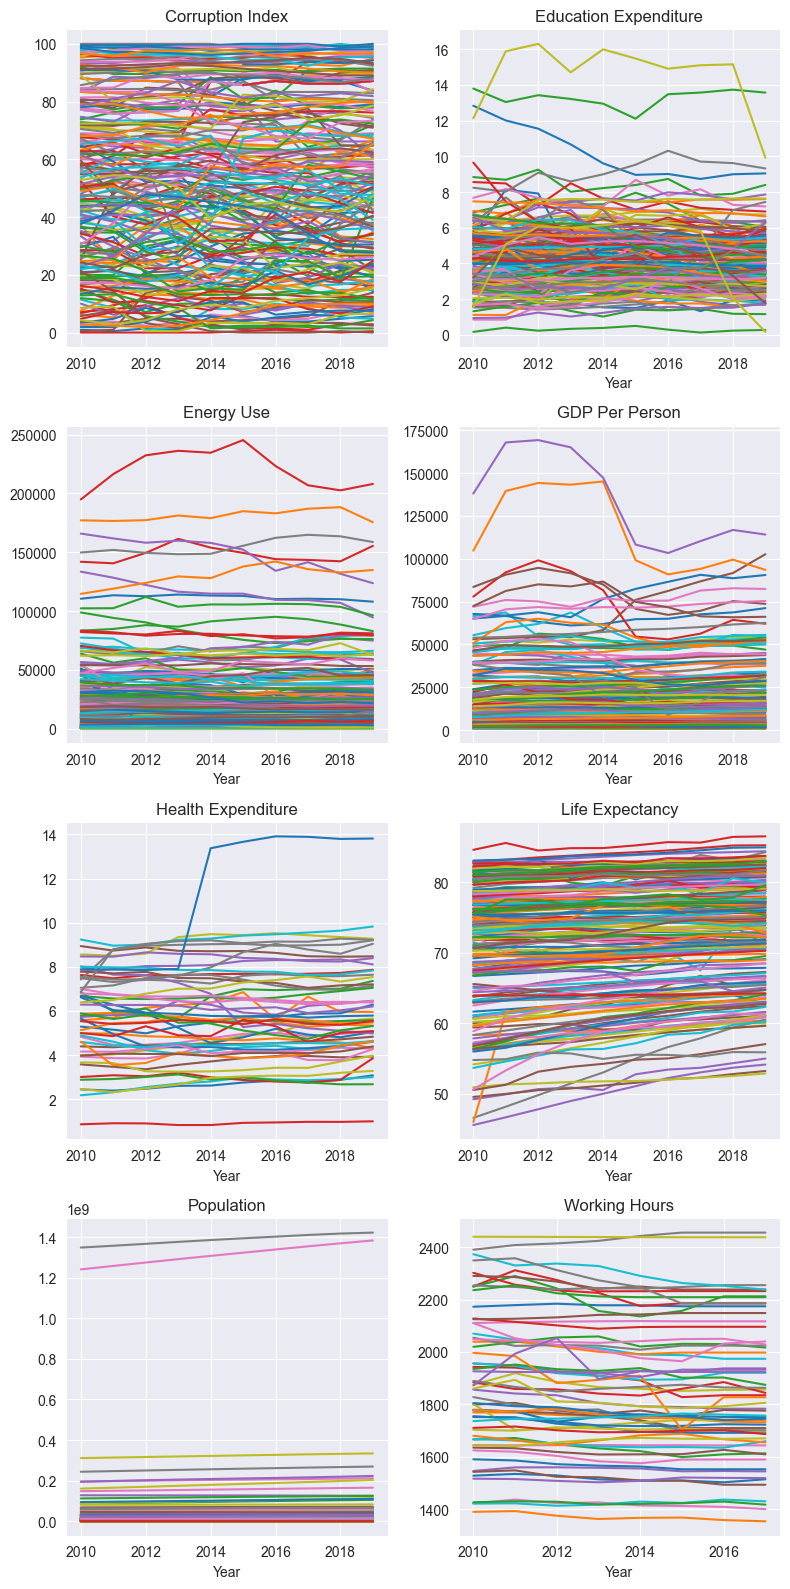

In [130]:
# get number of DataFrames
frames_len = len(data_frames)

# get number of columns and rows
cols = 2
rows= int(math.ceil(frames_len / cols))

# create figure with subplots
fig, axes = plt.subplots(rows, cols, tight_layout=True)

# set figure size
size = 4
fig.set_size_inches(size * cols, size * rows)

# plot DataFrame in subplots
count = 0
for r in range(rows):
    for c in range(cols):
        if count >= frames_len:
            break
        ax = axes[r, c]
        data_frames[count].T.plot(ax=ax, legend=False)
        ax.set_title(titles[count])
        count += 1

## Build Data Table

In [131]:
data = pd.concat((f.T.mean() for f in data_frames), axis=1, keys=titles)
data.dropna(inplace=True)
data

,Corruption Index,Education Expenditure,Energy Use,GDP Per Person,Health Expenditure,Life Expectancy,Population,Working Hours
Argentina,43.545957,5.288548,22309.63530,21442.99310,6.1064,76.57422,4.299246e+07,1714.230250
Australia,94.430762,5.186581,66999.68740,51927.39920,6.5182,82.67296,2.366295e+07,1751.745063
Austria,90.577172,5.451972,47561.54950,49572.03070,7.6623,81.25873,8.610615e+06,1632.539563
Belgium,90.576051,6.440502,62955.36390,44182.65500,8.1151,80.90352,1.120536e+07,1551.660188
Brazil,47.340026,5.995620,16811.64030,15344.71315,3.7264,74.23493,2.042200e+08,1742.885937
Bulgaria,48.547700,3.863311,29280.99660,18128.67690,4.1310,74.59388,7.333468e+06,1644.174913
Canada,95.049354,4.892129,111539.36260,48193.27460,7.4883,81.86558,3.564050e+07,1704.092875
Chile,86.147466,4.888898,23549.68380,22772.62280,4.7753,79.60816,1.787801e+07,2010.250000
China,43.270993,3.683746,24993.68180,12453.88880,2.7202,76.80190,1.387795e+09,2176.895812
Colombia,43.264627,4.562121,10662.31520,13541.65460,5.5732,76.06936,4.713850e+07,2010.771662


# Multivariate Analysis

## Covariance Matrix

In [132]:
data.cov()

,Corruption Index,Education Expenditure,Energy Use,GDP Per Person,Health Expenditure,Life Expectancy,Population,Working Hours
Corruption Index,4.305692e+02,1.122650e+01,4.002882e+05,2.991445e+05,3.201411e+01,5.855095e+01,-2.090226e+09,-3.123887e+03
Education Expenditure,1.122650e+01,1.250092e+00,1.624789e+04,5.827337e+03,9.915808e-01,1.134009e+00,-8.003593e+07,-8.320984e+01
Energy Use,4.002882e+05,1.624789e+04,9.849319e+08,3.527713e+08,3.252550e+04,5.987558e+04,-1.685546e+12,-3.691429e+06
GDP Per Person,2.991445e+05,5.827337e+03,3.527713e+08,3.209901e+08,2.537035e+04,4.800391e+04,-1.589645e+12,-2.929016e+06
Health Expenditure,3.201411e+01,9.915808e-01,3.252550e+04,2.537035e+04,4.572430e+00,5.366307e+00,-2.081036e+08,-3.270720e+02
Life Expectancy,5.855095e+01,1.134009e+00,5.987558e+04,4.800391e+04,5.366307e+00,1.611354e+01,-3.789413e+08,-5.110952e+02
Population,-2.090226e+09,-8.003593e+07,-1.685546e+12,-1.589645e+12,-2.081036e+08,-3.789413e+08,7.707171e+16,2.154392e+10
Working Hours,-3.123887e+03,-8.320984e+01,-3.691429e+06,-2.929016e+06,-3.270720e+02,-5.110952e+02,2.154392e+10,5.030607e+04


## Correlation Matrix

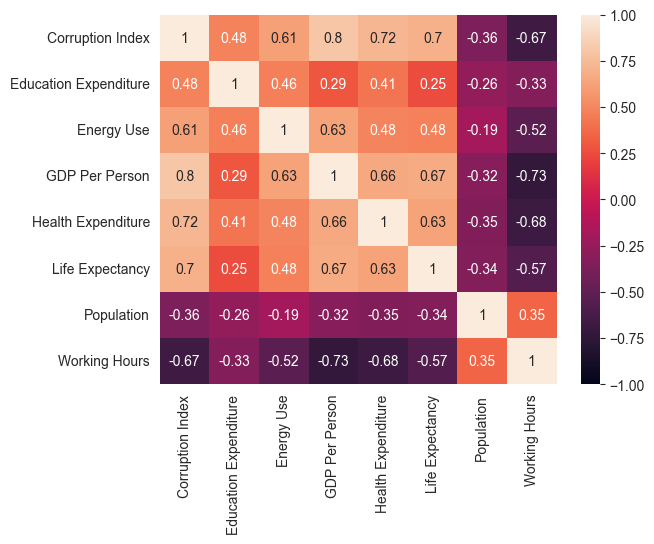

In [133]:
corr = data.corr()
sb.heatmap(corr, annot=True, vmin=-1, vmax=1);

## Eigenvalues

In [134]:
eigenvalues = np.linalg.eigvals(corr)
eigenvalues = np.sort(eigenvalues)[::-1]

eigenvalues_df = pd.DataFrame(eigenvalues, columns=['Eigenvalue'], index=pd.RangeIndex(1, len(eigenvalues) + 1))
eigenvalues_df.index.name = 'PC'

eigenvalues_df

,Eigenvalue
PC,
1,4.634174
2,0.870332
3,0.853454
4,0.490868
5,0.442057
6,0.289138
7,0.271886
8,0.148092


## Scree Plot

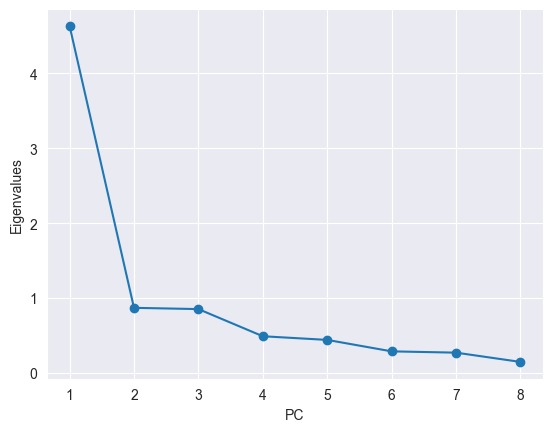

In [135]:
eigenvalues_df.plot(marker='o', ylabel='Eigenvalues', legend=False);

## Principal Components Analysis

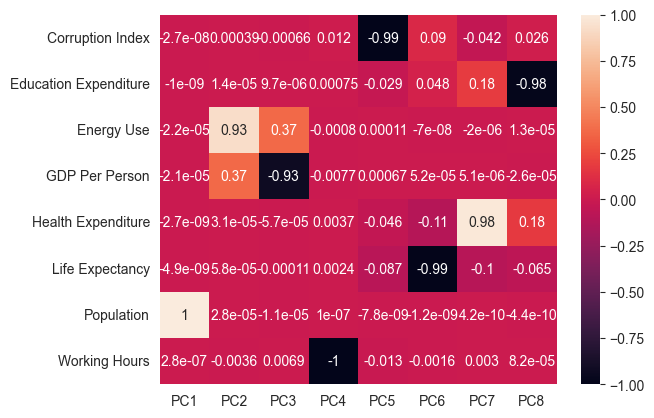

In [136]:
pca = PCA(n_components=data.shape[1], whiten=True)
pca.fit(data)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i + 1}' for i in range(len(data.columns))],
index=data.columns)

sb.heatmap(loadings, annot=True, vmin=-1, vmax=1);

## Factor Analysis

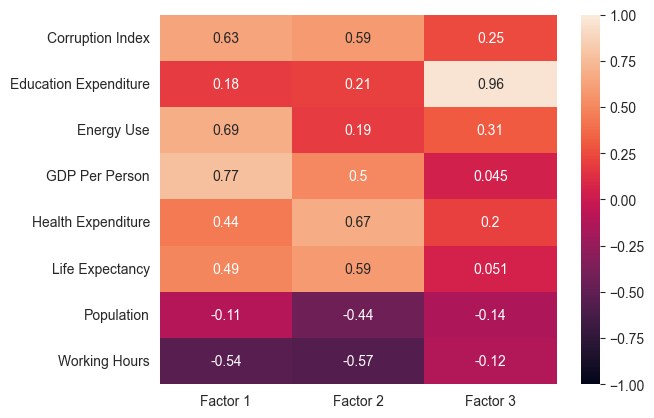

In [137]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(data)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor %s' % (i + 1) for i in range(fa.n_factors)],
index=data.columns)

sb.heatmap(loadings, annot=True, vmin=-1, vmax=1);

## Cronbach Alpha

In [138]:
pd.DataFrame((pg.cronbach_alpha(data.drop(c, axis=1).corr())[0] for c in data.columns), index=data.columns, columns=['Cronbach Alpha'])

,Cronbach Alpha
Corruption Index,0.002728
Education Expenditure,0.281479
Energy Use,0.137572
GDP Per Person,0.056966
Health Expenditure,0.086722
Life Expectancy,0.129695
Population,0.691576
Working Hours,0.641839


## Cluster Analysis

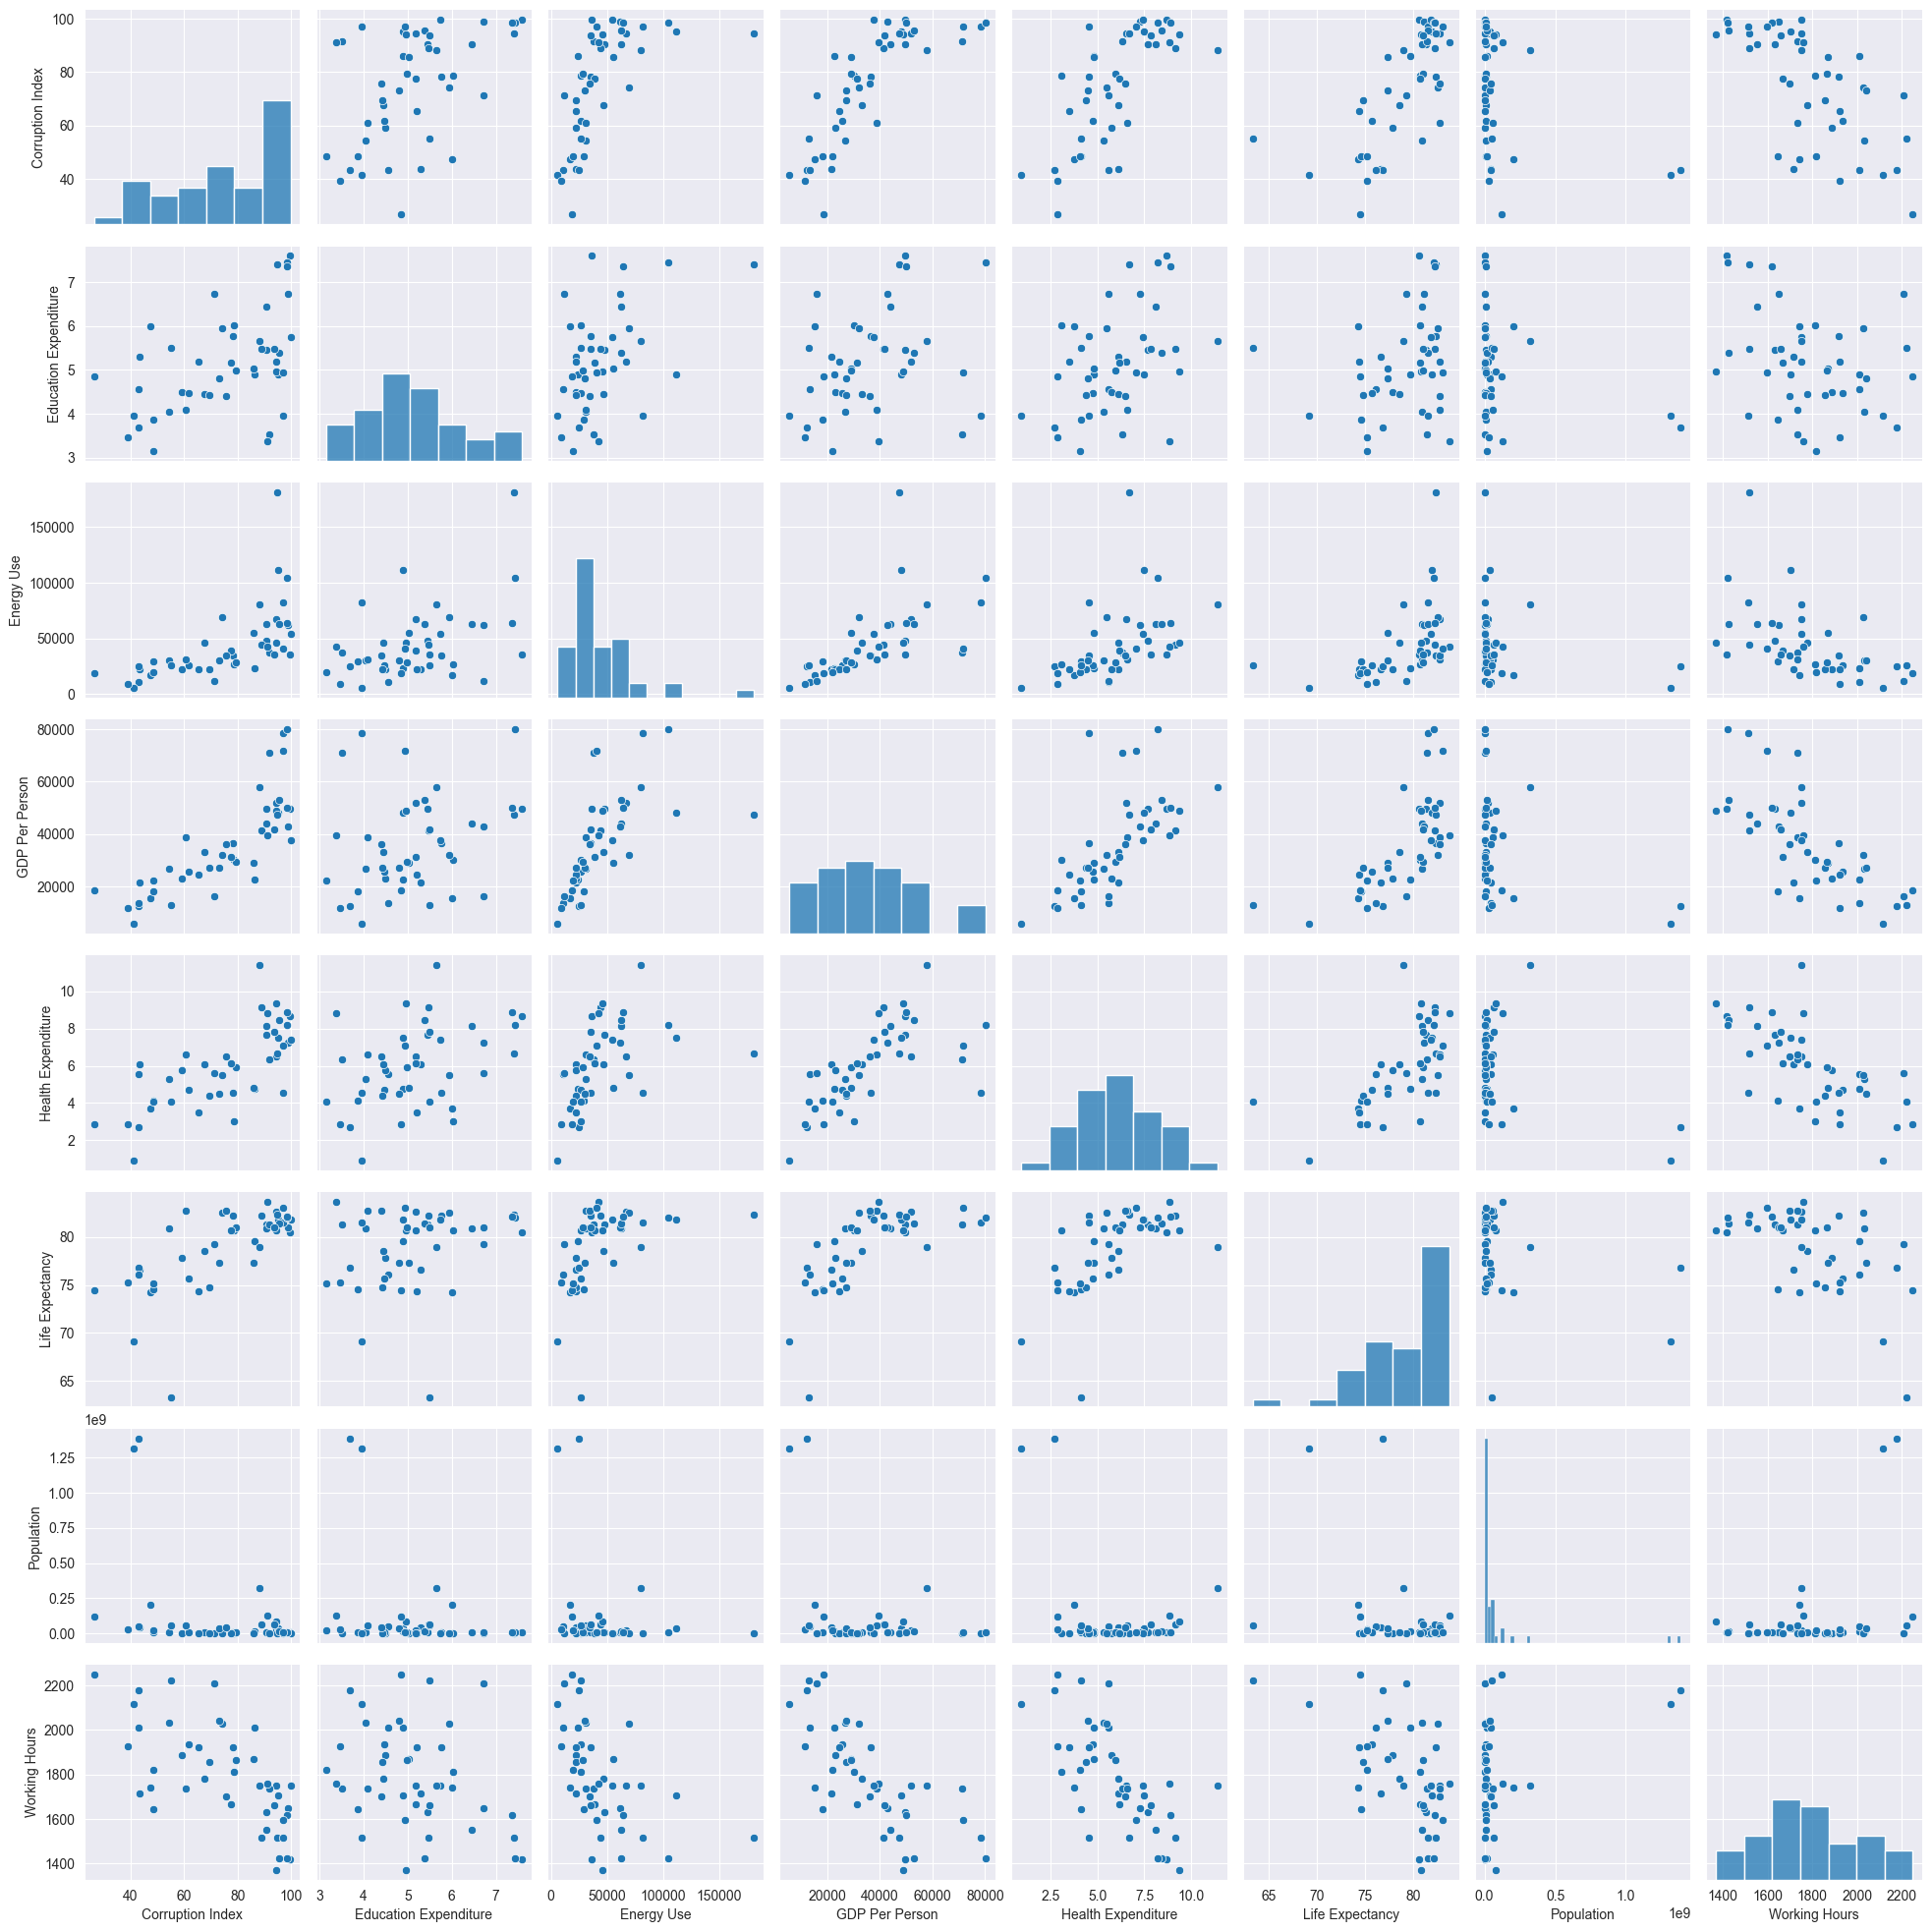

In [139]:
sb.pairplot(data);

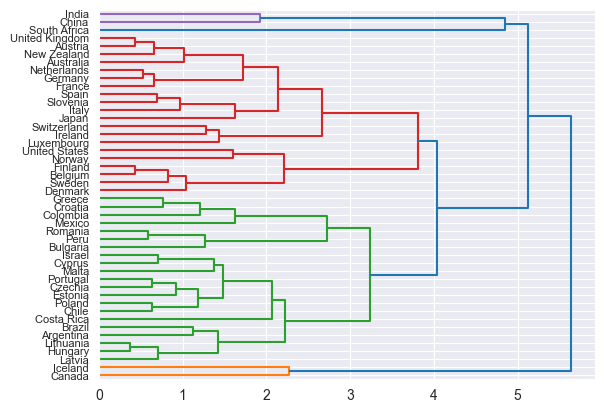

In [140]:
# standardize data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

linkage_data = linkage(standardized_data, method='complete', metric='chebyshev')
clusters_data = dendrogram(linkage_data, labels=data.index, orientation='right');

In [141]:
clusters = pd.DataFrame(np.array([clusters_data['ivl'], clusters_data['leaves_color_list']]).T, columns=['Countries', 'Cluster'])
clusters.groupby('Cluster')['Countries'].apply(list)

Cluster
C0                                       [South Africa]
C1                                    [Canada, Iceland]
C2    [Latvia, Hungary, Lithuania, Argentina, Brazil...
C3    [Denmark, Sweden, Belgium, Finland, Norway, Un...
C4                                       [China, India]
Name: Countries, dtype: object